📊 Avaliação no conjunto de teste reservado:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           2       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



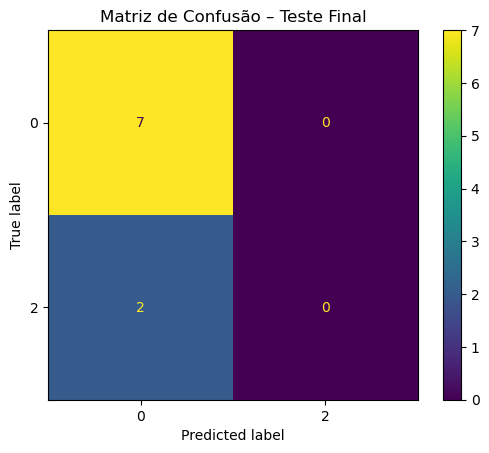

✅ Resultados guardados em: resultados_modelo


<Figure size 640x480 with 0 Axes>

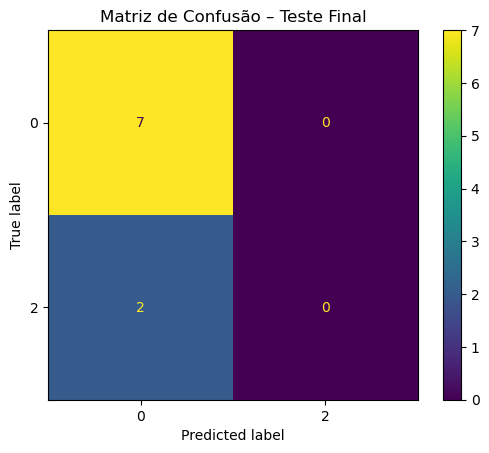

In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib
from datetime import datetime

def load_all_data(group_paths, group_labels):
    X = []
    y = []
    for folder, label in zip(group_paths, group_labels):
        files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])
        for file in files:
            path = os.path.join(folder, file)
            df = pd.read_csv(path)
            X.append(df['Reflectance'].values)
            y.append(label)
    return np.array(X), np.array(y)

# === Caminhos e labels
group_paths_oct6 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-10-06_Colon-Cancer/Measurements_fixed/Group{i}/ReflectanceandAbsorbance"
    for i in range(1, 18)
]
group_paths_aug11 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-08-11_Colon_Cancer/Measurements_organised/Group{i}/ReflectanceandAbsorbance{i}"
    for i in range(1, 23)
]
group_paths_total = group_paths_oct6 + group_paths_aug11
group_labels_oct6 = [2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0]
group_labels_aug11 = [2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2]
group_labels_total = group_labels_oct6 + group_labels_aug11

# === Separar treino e teste
indices_test = [4, 17, 17 + 6, 17 + 11]
train_paths = [p for i, p in enumerate(group_paths_total) if i not in indices_test]
test_paths = [p for i, p in enumerate(group_paths_total) if i in indices_test]
train_labels = [l for i, l in enumerate(group_labels_total) if i not in indices_test]
test_labels = [l for i, l in enumerate(group_labels_total) if i in indices_test]

# === Carregar e preparar dados
X_train_full, y_train_full = load_all_data(train_paths, train_labels)
X_test_final, y_test_final = load_all_data(test_paths, test_labels)
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_final)

# === Treinar modelo
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train_scaled, y_train_full)

# === Avaliação
y_pred_final = model.predict(X_test_scaled)
report_text = classification_report(y_test_final, y_pred_final, zero_division=0)
print("📊 Avaliação no conjunto de teste reservado:")
print(report_text)

# === Matriz de confusão
cm = confusion_matrix(y_test_final, y_pred_final)
labels_presentes = sorted(np.unique(np.concatenate((y_test_final, y_pred_final))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.show()

# === Guardar resultados
results_dir = "resultados_modelo"
os.makedirs(results_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
prefix = f"{results_dir}/logistic_test_{timestamp}"

with open(f"{prefix}_report.txt", "w") as f:
    f.write("Classification Report - Conjunto de Teste Final\n\n")
    f.write(report_text)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.savefig(f"{prefix}_confusion_matrix.png", bbox_inches="tight")

joblib.dump(model, f"{prefix}_modelo.pkl")

print(f"✅ Resultados guardados em: {results_dir}")


In [11]:
from collections import Counter
print("Distribuição no treino:", Counter(y_train_full))



Distribuição no treino: Counter({0: 72, 2: 40, 1: 30})


📊 Avaliação no conjunto de teste reservado:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           2       0.50      0.50      0.50         2

    accuracy                           0.78         9
   macro avg       0.68      0.68      0.68         9
weighted avg       0.78      0.78      0.78         9



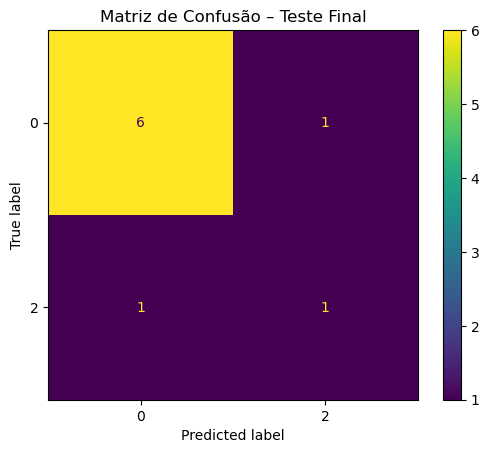

✅ Resultados guardados em: resultados_modelo_forcedbalance


<Figure size 640x480 with 0 Axes>

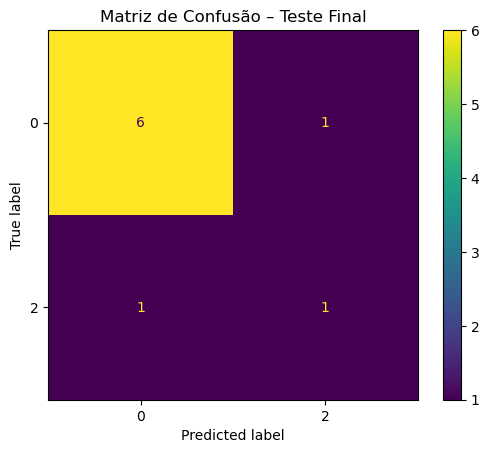

In [13]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib
from datetime import datetime

def load_all_data(group_paths, group_labels):
    X = []
    y = []
    for folder, label in zip(group_paths, group_labels):
        files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])
        for file in files:
            path = os.path.join(folder, file)
            df = pd.read_csv(path)
            X.append(df['Reflectance'].values)
            y.append(label)
    return np.array(X), np.array(y)

# === Caminhos e labels
group_paths_oct6 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-10-06_Colon-Cancer/Measurements_fixed/Group{i}/ReflectanceandAbsorbance"
    for i in range(1, 18)
]
group_paths_aug11 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-08-11_Colon_Cancer/Measurements_organised/Group{i}/ReflectanceandAbsorbance{i}"
    for i in range(1, 23)
]
group_paths_total = group_paths_oct6 + group_paths_aug11
group_labels_oct6 = [2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0]
group_labels_aug11 = [2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2]
group_labels_total = group_labels_oct6 + group_labels_aug11

# === Separar treino e teste
indices_test = [4, 17, 17 + 6, 17 + 11]
train_paths = [p for i, p in enumerate(group_paths_total) if i not in indices_test]
test_paths = [p for i, p in enumerate(group_paths_total) if i in indices_test]
train_labels = [l for i, l in enumerate(group_labels_total) if i not in indices_test]
test_labels = [l for i, l in enumerate(group_labels_total) if i in indices_test]

# === Carregar e preparar dados
X_train_full, y_train_full = load_all_data(train_paths, train_labels)
X_test_final, y_test_final = load_all_data(test_paths, test_labels)
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_final)

# === Treinar modelo
model = LogisticRegression(multi_class='multinomial', max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train_full)

# === Avaliação
y_pred_final = model.predict(X_test_scaled)
report_text = classification_report(y_test_final, y_pred_final, zero_division=0)
print("📊 Avaliação no conjunto de teste reservado:")
print(report_text)

# === Matriz de confusão
cm = confusion_matrix(y_test_final, y_pred_final)
labels_presentes = sorted(np.unique(np.concatenate((y_test_final, y_pred_final))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.show()

# === Guardar resultados
results_dir = "resultados_modelo_forcedbalance"
os.makedirs(results_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
prefix = f"{results_dir}/logistic_test_{timestamp}"

with open(f"{prefix}_report.txt", "w") as f:
    f.write("Classification Report - Conjunto de Teste Final\n\n")
    f.write(report_text)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.savefig(f"{prefix}_confusion_matrix.png", bbox_inches="tight")

joblib.dump(model, f"{prefix}_modelo.pkl")

print(f"✅ Resultados guardados em: {results_dir}")


📊 Avaliação no conjunto de teste reservado:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2

    accuracy                           0.67         9
   macro avg       0.33      0.29      0.31         9
weighted avg       0.78      0.67      0.72         9



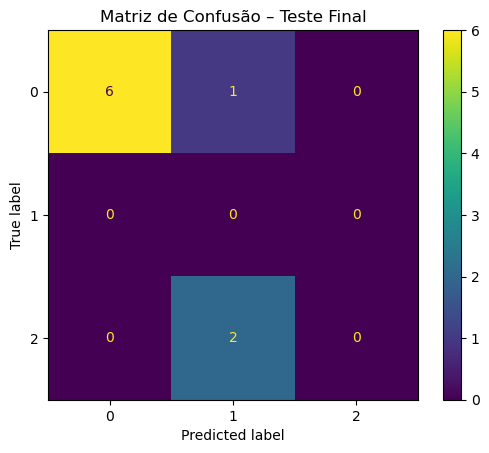

✅ Resultados guardados em: resultados_modelo_forcedbalance


<Figure size 640x480 with 0 Axes>

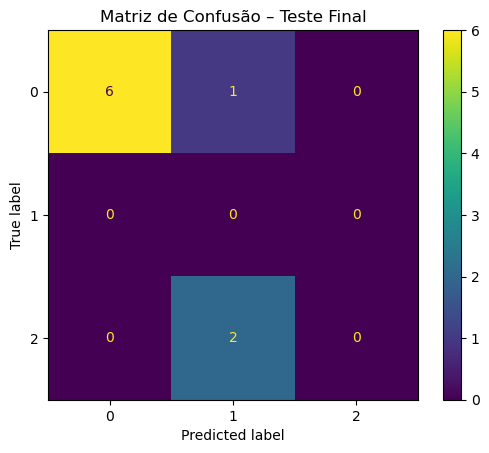

In [14]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib
from datetime import datetime

def load_all_data(group_paths, group_labels):
    X = []
    y = []
    for folder, label in zip(group_paths, group_labels):
        files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])
        for file in files:
            path = os.path.join(folder, file)
            df = pd.read_csv(path)
            X.append(df['Reflectance'].values)
            y.append(label)
    return np.array(X), np.array(y)

# === Caminhos e labels
group_paths_oct6 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-10-06_Colon-Cancer/Measurements_fixed/Group{i}/ReflectanceandAbsorbance"
    for i in range(1, 18)
]
group_paths_aug11 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-08-11_Colon_Cancer/Measurements_organised/Group{i}/ReflectanceandAbsorbance{i}"
    for i in range(1, 23)
]
group_paths_total = group_paths_oct6 + group_paths_aug11
group_labels_oct6 = [2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0]
group_labels_aug11 = [2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2]
group_labels_total = group_labels_oct6 + group_labels_aug11

# === Separar treino e teste
indices_test = [4, 17, 17 + 6, 17 + 11]
train_paths = [p for i, p in enumerate(group_paths_total) if i not in indices_test]
test_paths = [p for i, p in enumerate(group_paths_total) if i in indices_test]
train_labels = [l for i, l in enumerate(group_labels_total) if i not in indices_test]
test_labels = [l for i, l in enumerate(group_labels_total) if i in indices_test]

# === Carregar e preparar dados
X_train_full, y_train_full = load_all_data(train_paths, train_labels)
X_test_final, y_test_final = load_all_data(test_paths, test_labels)
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_final)

# === Treinar modelo
from sklearn.ensemble import RandomForestClassifier

# === 7. Treinar modelo Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train_full)


# === Avaliação
y_pred_final = model.predict(X_test_scaled)
report_text = classification_report(y_test_final, y_pred_final, zero_division=0)
print("📊 Avaliação no conjunto de teste reservado:")
print(report_text)

# === Matriz de confusão
cm = confusion_matrix(y_test_final, y_pred_final)
labels_presentes = sorted(np.unique(np.concatenate((y_test_final, y_pred_final))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.show()

# === Guardar resultados
results_dir = "resultados_modelo_forcedbalance"
os.makedirs(results_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
prefix = f"{results_dir}/logistic_test_{timestamp}"

with open(f"{prefix}_report.txt", "w") as f:
    f.write("Classification Report - Conjunto de Teste Final\n\n")
    f.write(report_text)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.savefig(f"{prefix}_confusion_matrix.png", bbox_inches="tight")

joblib.dump(model, f"{prefix}_modelo.pkl")

print(f"✅ Resultados guardados em: {results_dir}")






📊 Avaliação no conjunto de teste reservado:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2

    accuracy                           0.67         9
   macro avg       0.33      0.29      0.31         9
weighted avg       0.78      0.67      0.72         9



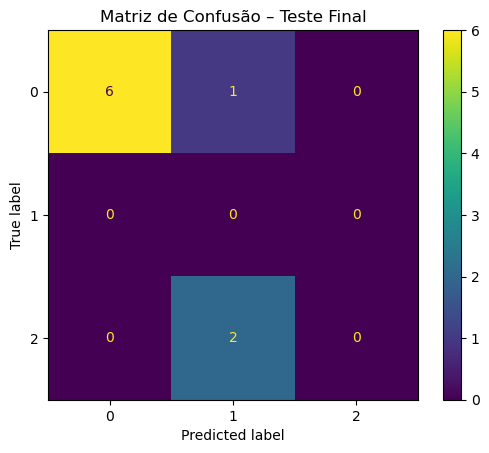

✅ Resultados guardados em: resultados_modelo_forcedbalance


<Figure size 640x480 with 0 Axes>

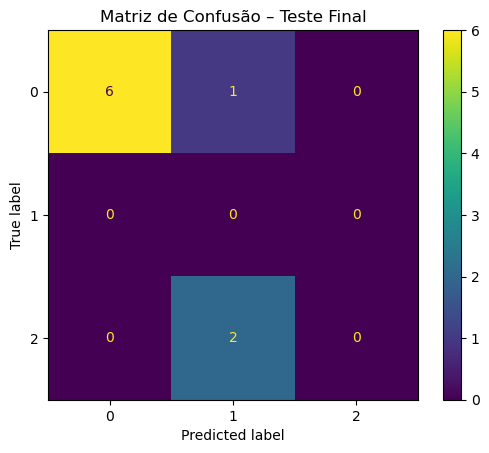

In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib
from datetime import datetime

def load_all_data(group_paths, group_labels):
    X = []
    y = []
    for folder, label in zip(group_paths, group_labels):
        files = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])
        for file in files:
            path = os.path.join(folder, file)
            df = pd.read_csv(path)
            X.append(df['Reflectance'].values)
            y.append(label)
    return np.array(X), np.array(y)

# === Caminhos e labels
group_paths_oct6 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-10-06_Colon-Cancer/Measurements_fixed/Group{i}/ReflectanceandAbsorbance"
    for i in range(1, 18)
]
group_paths_aug11 = [
    f"/Users/luisamaria/Desktop/UCL internship/2023-08-11_Colon_Cancer/Measurements_organised/Group{i}/ReflectanceandAbsorbance{i}"
    for i in range(1, 23)
]
group_paths_total = group_paths_oct6 + group_paths_aug11
group_labels_oct6 = [2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0]
group_labels_aug11 = [2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2]
group_labels_total = group_labels_oct6 + group_labels_aug11

# === Separar treino e teste
indices_test = [4, 17, 17 + 6, 17 + 11]
train_paths = [p for i, p in enumerate(group_paths_total) if i not in indices_test]
test_paths = [p for i, p in enumerate(group_paths_total) if i in indices_test]
train_labels = [l for i, l in enumerate(group_labels_total) if i not in indices_test]
test_labels = [l for i, l in enumerate(group_labels_total) if i in indices_test]

# === Carregar e preparar dados
X_train_full, y_train_full = load_all_data(train_paths, train_labels)
X_test_final, y_test_final = load_all_data(test_paths, test_labels)
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_final)

# === 7. Treinar modelo Random Forest com balanceamento
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train_full)

# === 8. Avaliação
y_pred_final = model.predict(X_test_scaled)
report_text = classification_report(y_test_final, y_pred_final, zero_division=0)
print("📊 Avaliação no conjunto de teste reservado:")
print(report_text)

# === 9. Matriz de confusão
cm = confusion_matrix(y_test_final, y_pred_final)
labels_presentes = sorted(np.unique(np.concatenate((y_test_final, y_pred_final))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.show()

# === 10. Guardar resultados
results_dir = "resultados_modelo_forcedbalance"
os.makedirs(results_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
prefix = f"{results_dir}/randomforest_test_{timestamp}"

# Guardar classification_report
with open(f"{prefix}_report.txt", "w") as f:
    f.write("Classification Report - Conjunto de Teste Final\n\n")
    f.write(report_text)

# Guardar matriz de confusão
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot()
plt.title("Matriz de Confusão – Teste Final")
plt.savefig(f"{prefix}_confusion_matrix.png", bbox_inches="tight")

# Guardar modelo
joblib.dump(model, f"{prefix}_modelo.pkl")

print(f"✅ Resultados guardados em: {results_dir}")
